Chapter 31
# 用色谱分段渲染一条曲线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [46]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义函数

In [2]:
def colorline(x, y, cmap):
    
    norm=plt.Normalize(0.0, 1.0)
    # 归一化函数，将数据线性归一化在 [0, 1] 区间
    segments = make_segments(x, y)
    # make_segments 自定义函数，将一条线打散成一系列线段
    
    lc = LineCollection(segments, array = np.linspace(0.0, 1.0, len(x)),
                              cmap=cmap, norm=norm,
                              linewidth=1, alpha=1)
    # LineCollection 可以看成是一系列线段的集合
    # 可以用色谱分别渲染每一条线段
    # 这样可以得到颜色连续变化的效果
    

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    
    # 将一条线打散成一系列线段

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

### 2. 生成平面随机轨迹

In [19]:
N_steps = 10000; 
# 随机轨迹的步数

delta_x = np.random.normal(loc=0.0, scale=1.0, size=(N_steps,1))
delta_y = np.random.normal(loc=0.0, scale=1.0, size=(N_steps,1))
# 生成满足正态分布的随机数
 
disp_x = np.cumsum(delta_x, axis = 0); 
disp_y = np.cumsum(delta_y, axis = 0); 
# 用累加生成平面轨迹

disp_x = np.vstack(([0],disp_x))
disp_y = np.vstack(([0],disp_y))
# 给轨迹添加起点 (0, 0)


### 3. 可视化一条曲线

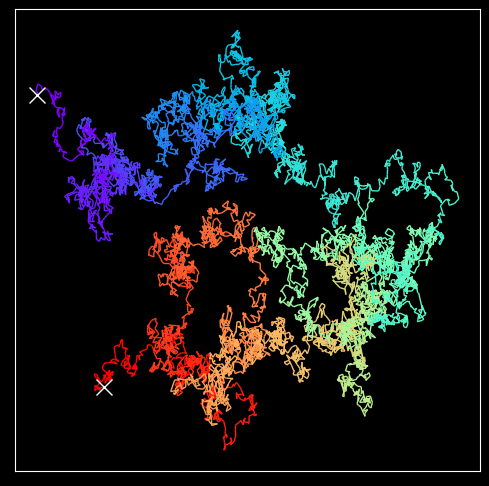

In [49]:
fig, ax = plt.subplots(figsize = (6,6))
plt.style.use('dark_background')
# 使用黑色背景

colorline(disp_x, disp_y, cmap='rainbow_r')
# 调用自定义函数 colorline

plt.plot(disp_x[0],disp_y[0],'wx', markersize = 12)
plt.plot(disp_x[-1],disp_y[-1],'wx', markersize = 12)
# 绘制起点、终点

plt.xticks([])
plt.yticks([])
fig.savefig('Figures/可视化一条曲线.svg', format='svg')

### 4. 生成多条轨迹

In [44]:
N_steps = 200; 
# 步数

N_paths = 50;
# 轨迹数量

sigma = 1
delta_t = 0.2
# 随机过程的参数
# 请参考《数据有道》第8章

delta_X = np.random.normal(loc=0.0, scale=sigma*np.sqrt(delta_t), size=(N_steps,N_paths))
# 生成服从正态分布随机数

t_n = np.linspace(0,N_steps,N_steps+1,endpoint = True)*delta_t
# 时间戳数据

X = np.cumsum(delta_X, axis = 0)
# 用累加生成沿时间多条轨迹轨迹

X_0 = np.zeros((1,N_paths))
X = np.vstack((X_0,X))
# 给轨迹添加起点


### 5. 可视化多条曲线

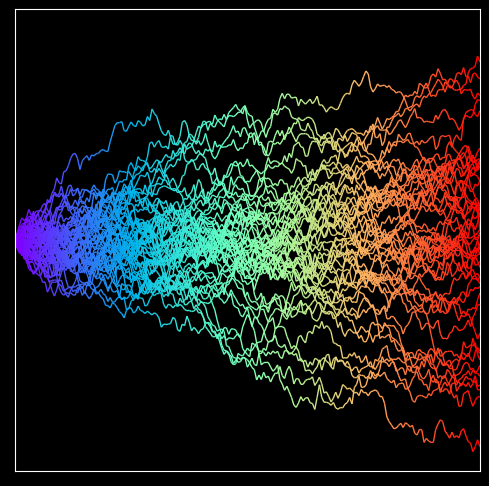

In [48]:
fig, ax = plt.subplots(figsize = (6,6))
plt.style.use('dark_background')

for idx in range(X.shape[1]):
    # 分别绘制50条轨迹
    
    y_idx = X[:,idx]
    
    colorline(t_n, y_idx, cmap='rainbow')
    # 每条轨迹分段着色

ax.set_xlim([0,N_steps*delta_t])
ax.set_ylim([-20,20])
ax.set_yticks([])
ax.set_xticks([])
plt.show()
fig.savefig('Figures/可视化多条曲线.svg', format='svg')

In [7]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023